<a href="https://colab.research.google.com/github/gasparmamac/DeepLearningNotebook/blob/main/Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sn
# scikit-learn modules to create data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# keras modules to build model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

block_plot = False
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 7)

<h1>2 Generate Dataset

Input (x) shape: (1000, 2)
Labels (y) shape: (1000,)


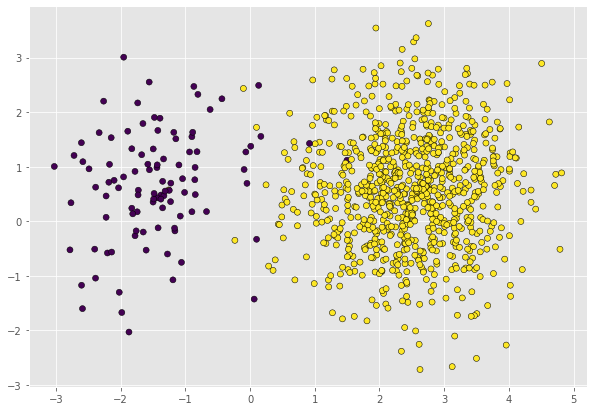

In [3]:
# choose the random seed
seed = 42
# fix it for numpy and tensorflow calculations
rng = np.random.RandomState(seed)
tf.random.set_seed(seed)

# generate classification data as a set of points and their labels
x, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=1,
    n_samples=1000,
    class_sep=2.0,
    weights=[0.1, 0.9],
    random_state=seed,
    n_clusters_per_class=1
)
# add random uniform noise to the data
x += rng.uniform(size=x.shape)

print('Input (x) shape: {}'.format(x.shape))
print('Labels (y) shape: {}'.format(y.shape))

plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k');

<h1>3 Create a Logistic Regression Model

In [4]:
# two-class logistic regression model
def logistic_regression(train_input):
  logistics_regression_model = Sequential()

  # model consist of one layer and sigmoid activation
  logistics_regression_model.add(Dense(1, activation='sigmoid', input_dim=train_input.shape[1]))
  return logistics_regression_model

<h1>Training and Prediction

In [5]:
# prepare train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# define model
log_regression_model = logistic_regression(train_input=x_train)

# define optimizer
optimizer = SGD(lr=0.01)

# set optimizer, loss and metrics for our training
log_regression_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# initialize and start training
log_regression_model.fit(epochs=100, x=x_train, y=y_train, use_multiprocessing=False)

# get predicted labels after training is done
y_predicted = log_regression_model.predict(x_test)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8453
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8867
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.9027
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9227
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9280
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9387
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9467
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9480
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9520
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9573
Epoch 11/

<h1>5 Confusion Matrix

In [6]:
def confusion_matrix(TP, FP, FN, TN):

  # get confusion matrix as defined in figure
  cm = np.array([[TP, FN], [FN, TN]])

  num_p = TP + FP
  num_n = TN + FN

  cm_norm = np.array([[TP/num_p, FP/num_p], [FN/num_n, TN/num_n]])

  return cm, cm_norm

def get_tp_fn_fp_tn(thres_prob=0.5):
  TP = tf.keras.metrics.TruePositives(thresholds=thres_prob, name=None, dtype=None)
  TP.update_state(y_test, y_predicted)

  FP = tf.keras.metrics.FalsePositives(thresholds=thres_prob, name=None, dtype=None)
  FP.update_state(y_test, y_predicted)

  TN = tf.keras.metrics.TrueNegatives(thresholds=thres_prob, name=None, dtype=None)
  TN.update_state(y_test, y_predicted)

  FN = tf.keras.metrics.FalseNegatives(thresholds=thres_prob, name=None, dtype=None)
  FN.update_state(y_test, y_predicted)

  return TP.result().numpy(), FP.result().numpy(), TN.result().numpy(), FN.result().numpy()

Confusion Matrix for threshold probability 0.5


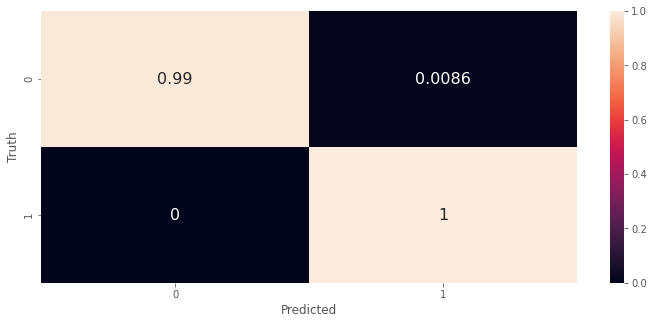

Confusion Matrix for threshold probability 0.6


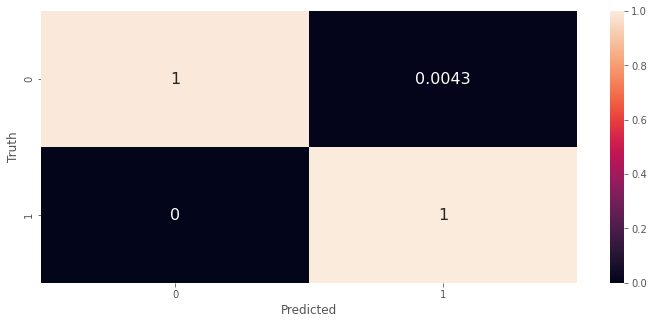

In [7]:
# threshold probability 0.5
tp, fp, tn, fn = get_tp_fn_fp_tn(0.5)
print('Confusion Matrix for threshold probability 0.5')
cm, cm_norm, = confusion_matrix(tp, fp, fn, tn)

plt.figure(figsize=[12, 5])
sn.heatmap(cm_norm, annot=True, annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# threshold probability 0.6
tp, fp, tn, fn = get_tp_fn_fp_tn(0.6)
print('Confusion Matrix for threshold probability 0.6')
cm, cm_norm, = confusion_matrix(tp, fp, fn, tn)

plt.figure(figsize=[12, 5])
sn.heatmap(cm_norm, annot=True, annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

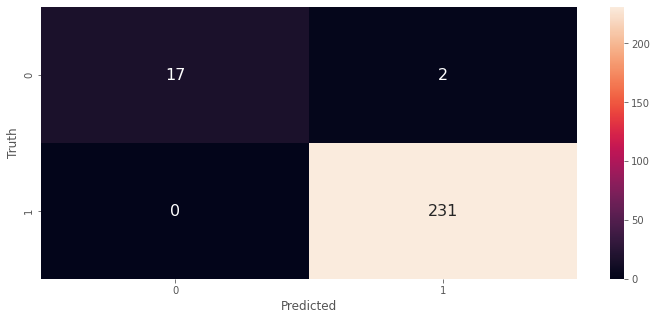

In [8]:
# Using the tensorflow.math.confusion_matrix() function
preds = tf.cast(y_predicted>0.5, dtype=tf.float32)

cm = tf.math.confusion_matrix(y_test, preds)

plt.figure(figsize=[12, 5])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h1>6 Accuracy

In [9]:
preds = tf.cast(y_predicted >= 0.5, dtype=tf.float32)
accuracy = tf.keras.metrics.binary_accuracy(tf.expand_dims(y_test, 1), y_predicted, threshold=0.5)
print(f'Accuracy at threshold 0.5: {tf.reduce_mean(accuracy).numpy()}')

Accuracy at threshold 0.5: 0.9919999837875366


<h1>7 Precision

In [12]:
threshold = 0.5
precision = tf.keras.metrics.Precision(thresholds=threshold)
precision.update_state(y_test, y_predicted)
print(f'Precision at threshold 0.5: {precision.result().numpy()}')

Precision at threshold 0.5: 0.991416335105896


<h1>8 Recall / Sensitivity

In [16]:
threshold = 0.5
precision = tf.keras.metrics.Recall(thresholds=threshold)
precision.update_state(y_test, y_predicted)
print(f'Recall at threshold 0.5: {precision.result().numpy()}')

Recall at threshold 0.5: 1.0


<h1>9 F1-Score

In [13]:
thres_prob = 0.5
predictions = y_predicted > thres_prob
tp, fp, tn, fn = get_tp_fn_fp_tn(thres_prob)
f1_score = (2*tp)/(2*tp +fp + fn)
print(f'F1-Score at threshold 0.5: {f1_score}')

F1-Score at threshold 0.5: 0.9956896551724138


<h1>10 ROC Curve

In [22]:
thresholds = np.linspace(0.001, 0.999, 1000)
len(thresholds)

1000

In [24]:
auc = tf.keras.metrics.AUC(thresholds=thresholds)
auc.update_state(y_test, y_predicted)
print(f'AUC: {auc.result().numpy()}')

AUC: 1.0


In [26]:
# plot ROC curve using the thresholds
tpr_list, fpr_list = [], []
for threshold in thresholds:
  # get TP, FP,FN and TN to calculate TPR and FPR
  tp, fp, tn, fn = get_tp_fn_fp_tn(threshold)

  # sensitivity, recall or tpr
  tpr = tp/(tp+fn)
  tpr_list.append(tpr)

  # flase positive rate fpr
  fpr = fp/(fp+tn)
  fpr_list.append(fpr)

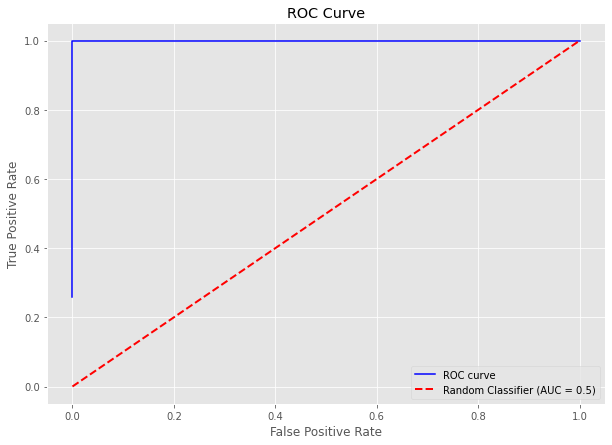

In [27]:
plt.plot(fpr_list, tpr_list, label='ROC curve', color='b')
plt.plot([0, 1], [0, 1], label='Random Classifier (AUC = 0.5)', linestyle='--', lw=2, color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show(block=block_plot)